<a href="https://colab.research.google.com/github/anurag1504t/MachineLearning/blob/main/2018BCS_011_ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Lab Assignment - 1

In [135]:
# Several helpful packages to load in 
import numpy as np;
import matplotlib.pyplot as plt;
import math;
from random import randrange

# Global variables
n=20;             # No of points in Dataset
x_train=[];       # Independent 
y_train=[];       # Dependent

## Training Dataset

In [136]:
# Gaussian Noise Generation
noise=np.random.normal(0,1,n);
print(noise)

[-0.54532387  1.31575954 -0.5438119  -0.40830181  0.02911525 -0.92325809
 -0.96841316 -0.22804042  0.69652298 -1.61225083  0.43390019  0.50131683
  0.31839993 -1.07272556 -0.37858178 -0.17317566  0.35934413 -0.63502592
  2.62593135 -0.97647072]


In [137]:
# Generation of Random Dataset. y = sin(x) + noise
for i in range(0,n):
    x=randrange(0,n+1)*2*math.pi/n;
    x_train.append(x);
    y_train.append((math.sin(x)+noise[i]));

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = x_train.reshape(20,1)
y_train = y_train.reshape(20,1)

In [138]:
print('Randomly Generated Dataset with 20 points')
print('X | Y');
for i in range(0,n):
  print(x_train[i] , ' | ' , y_train[i]);

Randomly Generated Dataset with 20 points
X | Y
[5.34070751]  |  [-1.35434087]
[5.96902604]  |  [1.00674254]
[2.51327412]  |  [0.04397335]
[3.14159265]  |  [-0.40830181]
[6.28318531]  |  [0.02911525]
[5.65486678]  |  [-1.51104334]
[0.31415927]  |  [-0.65939616]
[5.02654825]  |  [-1.17909693]
[0.31415927]  |  [1.00553997]
[0.31415927]  |  [-1.30323383]
[0.62831853]  |  [1.02168545]
[2.19911486]  |  [1.31033383]
[5.96902604]  |  [0.00938294]
[3.45575192]  |  [-1.38174256]
[2.82743339]  |  [-0.06956479]
[2.82743339]  |  [0.13584134]
[4.39822972]  |  [-0.59171239]
[6.28318531]  |  [-0.63502592]
[5.65486678]  |  [2.0381461]
[0.]  |  [-0.97647072]


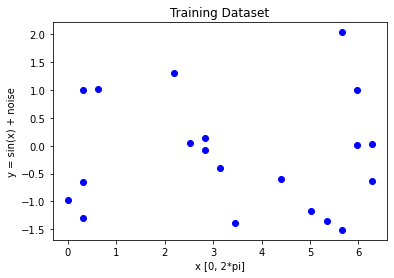

In [139]:
# Plot of Dataset
plt.plot(x_train,y_train,'bo');
plt.xlabel('x [0, 2*pi]');
plt.ylabel('y = sin(x) + noise');
plt.title('Training Dataset');
plt.show()

## Testing Dataset

In [140]:
# Variables
x_test = []
y_test = []

# Generation of Random Dataset. y = sin(x) 
for i in range(0,n):
    x=randrange(0,n+1)*2*math.pi/n;
    x_test.append(x);
    y_test.append(math.sin(x));

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.reshape(20,1)
y_test = y_test.reshape(20,1)

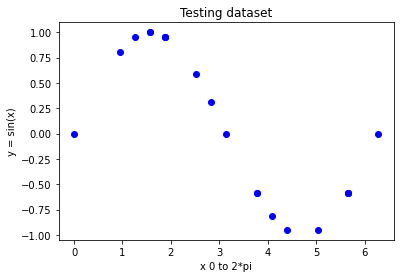

In [141]:
# Plot of Testing Dataset
plt.plot(x_test,y_test,'bo');
plt.xlabel('x 0 to 2*pi');
plt.ylabel('y = sin(x)');
plt.title('Testing dataset');
plt.show()

## Simple Linear Regression



In [142]:
# Fitting Simple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

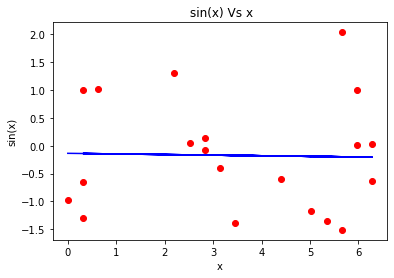

In [143]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title(' sin(x) Vs x')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

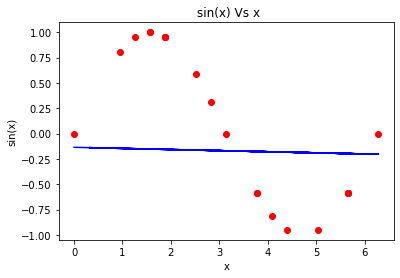

In [144]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title(' sin(x) Vs x')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [145]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.5848085442553519

## Multiple Linear Regression

### Training Data

In [146]:
# Variable Declarations
x1_train = []        # First Independent Variable
x2_train = []             # Second Independent Variable
ym_train = []              # Dependent Variable

# Generation of Random Dataset. y = sin(x1) + sin(x2) + noise
for i in range(0,n):
    x1=randrange(0,n+1)*2*math.pi/n
    x2=randrange(0,n+1)*2*math.pi/n
    x1_train.append(x1);
    x2_train.append(x2);
    ym_train.append((math.sin(x1) + math.sin(x2) + noise[i]));

x1_train = np.array(x1_train)
x2_train = np.array(x2_train)
ym_train = np.array(ym_train)

x1_train = x1_train.reshape(20,1)
x2_train = x2_train.reshape(20,1)
ym_train = ym_train.reshape(20,1)

xm_train = np.column_stack((x1_train, x2_train))

In [147]:
xm_train

array([[5.96902604, 5.34070751],
       [4.71238898, 1.25663706],
       [0.62831853, 1.88495559],
       [2.51327412, 0.31415927],
       [3.45575192, 5.96902604],
       [5.65486678, 4.08407045],
       [0.        , 2.51327412],
       [0.9424778 , 0.31415927],
       [0.        , 3.76991118],
       [3.45575192, 4.39822972],
       [5.34070751, 2.82743339],
       [5.65486678, 3.76991118],
       [5.02654825, 0.        ],
       [0.        , 3.76991118],
       [5.34070751, 0.31415927],
       [4.71238898, 0.31415927],
       [1.25663706, 5.34070751],
       [3.14159265, 3.45575192],
       [3.76991118, 4.39822972],
       [0.31415927, 6.28318531]])

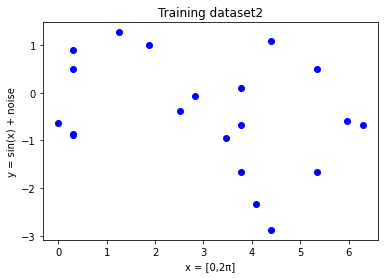

In [148]:
# Plot of Training Dataset
plt.plot(x2_train,ym_train,'bo');
plt.xlabel('x = [0,2π]');
plt.ylabel('y = sin(x) + noise');
plt.title('Training dataset2');
plt.show()

### Testing Dataset

In [149]:
# Variable Declarations
x1_test = []        # First Independent Variable
x2_test = []             # Second Independent Variable
ym_test = []              # Dependent Variable

# Generation of Random Dataset. y = sin(x1) + sin(x2) 
for i in range(0,n):
    x1=randrange(0,n+1)*2*math.pi/n
    x2=randrange(0,n+1)*2*math.pi/n
    x1_test.append(x1)
    x2_test.append(x2)
    ym_test.append((math.sin(x1) + math.sin(x2)))

xm_test = np.column_stack((x1_test, x2_test))

In [150]:
xm_test

array([[1.25663706, 5.65486678],
       [2.51327412, 5.96902604],
       [4.39822972, 0.        ],
       [2.82743339, 0.9424778 ],
       [0.31415927, 2.51327412],
       [3.45575192, 1.57079633],
       [1.88495559, 4.39822972],
       [0.9424778 , 2.82743339],
       [0.31415927, 4.08407045],
       [3.14159265, 1.57079633],
       [5.65486678, 0.9424778 ],
       [3.14159265, 0.62831853],
       [1.88495559, 3.76991118],
       [5.02654825, 5.65486678],
       [4.39822972, 1.57079633],
       [3.76991118, 0.        ],
       [0.31415927, 0.31415927],
       [2.82743339, 0.62831853],
       [3.14159265, 3.45575192],
       [4.71238898, 4.39822972]])

### Fitting Model

In [151]:
# Fitting Multiple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xm_train, ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
# Predicting the Test set results
ym_pred = regressor.predict(xm_test)

In [153]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(ym_test, ym_pred)

0.6292395274894388

## Polynomial Regression of Degree M

In [154]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [155]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

# Predicting the test set Results
y_pred_poly= rr.predict(x_test)

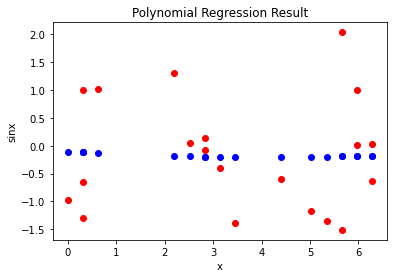

In [156]:
# Visualising the Polynomial Regression results 
plt.scatter(x_train, y_train, color='red')
# plt.plot(x_train, lin_reg_2.predict(poly_reg.fit_transform(x_train)), color='green', linestyle='--',linewidth =2)
plt.scatter(x_train, lin_reg_2.predict(poly_reg.fit_transform(x_train)), color='blue')
plt.title('Polynomial Regression Result')
plt.xlabel('x')
plt.ylabel('sinx')
plt.show()

In [157]:
mean_squared_error(y_test, y_pred_poly)

0.28176975577318797

## Ridge Regression

In [158]:
# Fitting Ridge Regression to the dataset 
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 

# Predicting the test set Results
y_pred_rr= rr.predict(x_test)


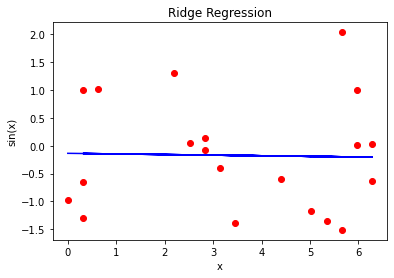

In [159]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, rr.predict(x_train), color = 'blue')
plt.title('Ridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

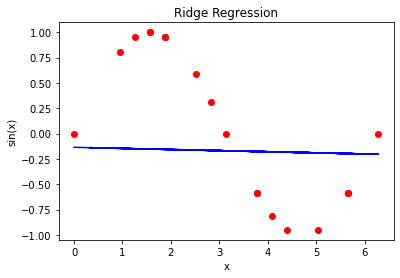

In [160]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, rr.predict(x_train), color = 'blue')
plt.title('Ridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [161]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_rr)

0.5848108250019599

## LASSO Regression

In [162]:
# Fitting LASSO Regression to the dataset 
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 

# Predicting the test set Results
y_pred_lasso= model_lasso.predict(x_test)


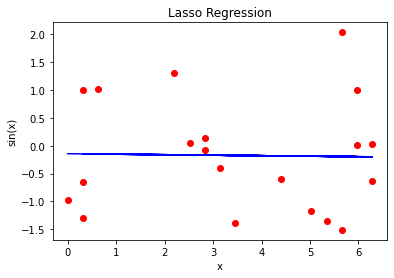

In [163]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model_lasso.predict(x_train), color = 'blue')
plt.title('Lasso Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

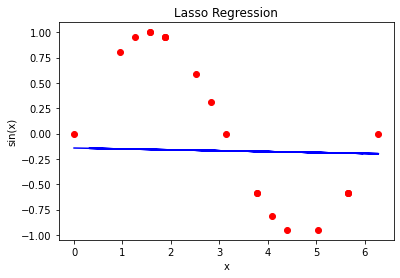

In [164]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, model_lasso.predict(x_train), color = 'blue')
plt.title('Lasso Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [165]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_lasso)

0.5889976680359978

## Elastic-Net Regression

In [166]:
# Fitting ElasticNet Regression to the dataset
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x_train, y_train) 

# Predicting the test set Results
y_pred_enet= model_enet.predict(x_test)

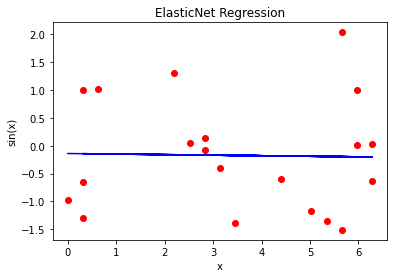

In [167]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model_enet.predict(x_train), color = 'blue')
plt.title('ElasticNet Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

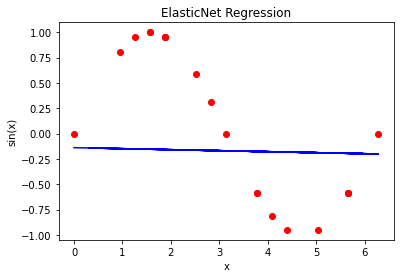

In [168]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, model_enet.predict(x_train), color = 'blue')
plt.title('ElasticNet Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [169]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_enet)

0.5869204348682414

## Bridge Regression

In [170]:
# Fitting Bridge Regression to the dataset
from sklearn.linear_model import BayesianRidge
model_bridge = BayesianRidge() 
model_bridge.fit(x_train, y_train)

# Predicting the test set Results
y_pred_bridge = model_bridge.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


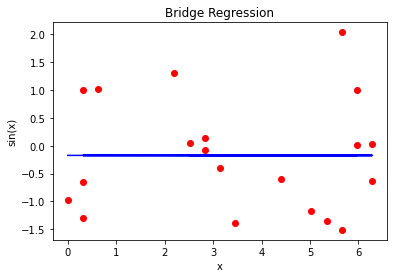

In [171]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model_bridge.predict(x_train), color = 'blue')
plt.title('Bridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

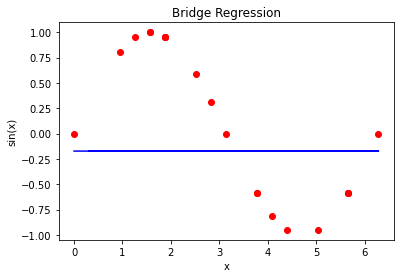

In [172]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, model_bridge.predict(x_train), color = 'blue')
plt.title('Bridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [173]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_bridge)

0.6073124826564269